In [106]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

In [107]:
Pats = pd.read_csv("Pats.csv")

In [108]:
Pats.describe()

,ACCOUNTID,RENEW,INTERCEPT,PLAYOFF,TENURE,OPENSNINETY,NOTES,TICKETSPEND,LIFETIMEMERCHSPEND,MISSEDALL,TENDUMMY,DISTANCE,PAWP,EMAILCATEGORIES,CATEGORYDUMMY,MISSEDREG,LOGINS,CLICKS90,PAWP.1,RAND
count,1.654200e+04,16542.000000,16542.0,16542.000000,16542.000000,16542.000000,16542.000000,16542.000000,16542.000000,16542.000000,16542.000000,16542.000000,16542.000000,16542.000000,16542.000000,16542.000000,16542.000000,16542.000000,16542.000000,16542.000000
mean,8.834567e+05,0.979386,1.0,0.917785,7.420082,2.418571,0.104280,3935.565832,19.850455,0.542982,0.968263,95.613227,0.403639,3.206021,0.809334,0.124773,3.757949,3.357756,0.403639,0.500285
std,1.531398e+06,0.142093,0.0,0.274700,2.274812,2.920959,0.374923,3065.093362,133.527716,0.841137,0.175305,297.469807,0.490642,2.072355,0.392838,0.420621,21.219137,4.824824,0.490642,0.289086
min,1.000140e+05,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,650.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000008
25%,1.854702e+05,1.000000,1.0,1.000000,5.000000,0.000000,0.000000,2340.000000,0.000000,0.000000,1.000000,17.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250947
50%,2.786980e+05,1.000000,1.0,1.000000,9.000000,2.000000,0.000000,3380.000000,0.000000,0.000000,1.000000,30.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.503741
75%,4.188528e+05,1.000000,1.0,1.000000,9.000000,4.000000,0.000000,4680.000000,0.000000,1.000000,1.000000,59.000000,1.000000,4.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.750602
max,6.895839e+06,1.000000,1.0,1.000000,10.000000,41.000000,5.000000,137970.000000,10298.350000,10.000000,1.000000,5065.000000,1.000000,14.000000,1.000000,7.000000,684.000000,74.000000,1.000000,0.999965


In [109]:
corr = Pats.corr()

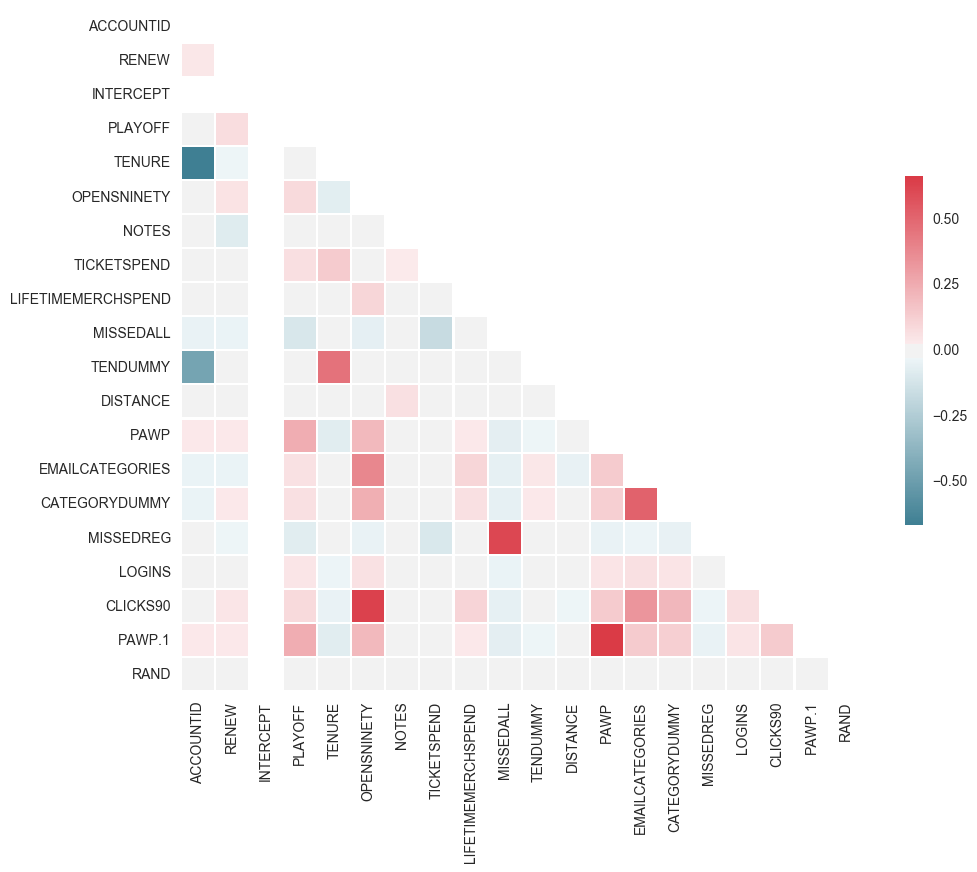

In [110]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.8, cbar_kws={"shrink": .5}, ax=ax)

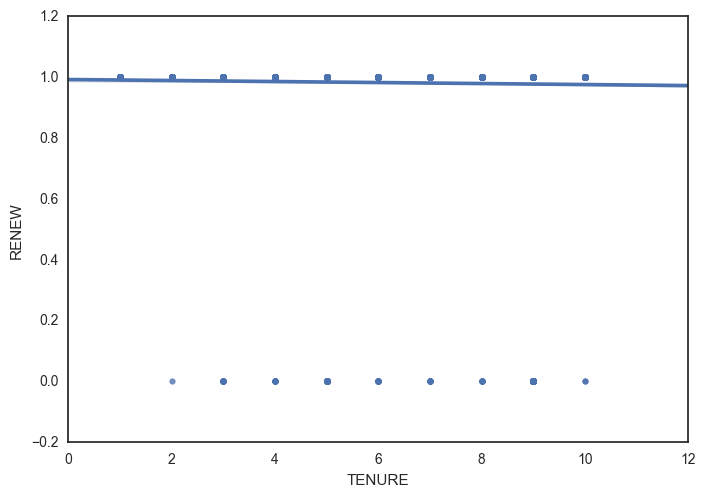

In [61]:
sns.regplot(x='TENURE', y='RENEW', data=Pats)

In [28]:
sns.regplot(x='OPENSNINETY', y='RENEW', data=Pats)

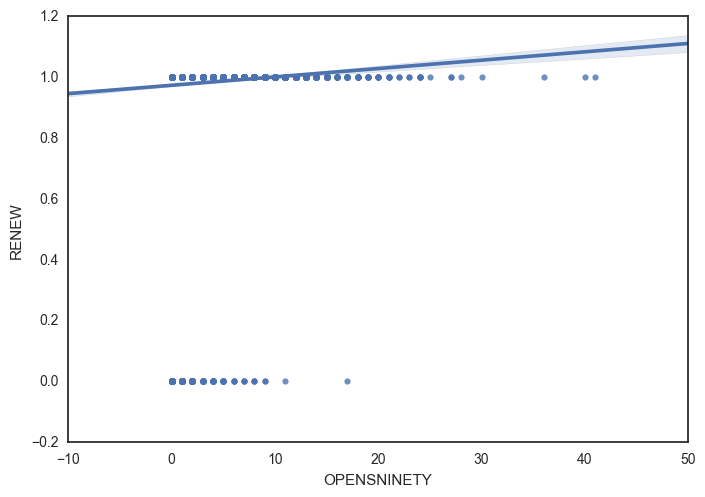

In [29]:
sns.plt.show()

In [30]:
sns.regplot(x='LIFETIMEMERCHSPEND', y='RENEW', data=Pats)

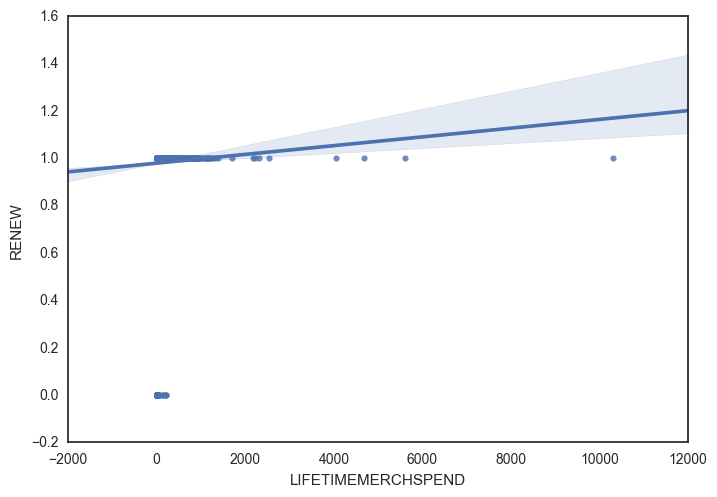

In [31]:
sns.plt.show()

In [32]:
sns.regplot(x='MISSEDALL', y='RENEW', data=Pats)

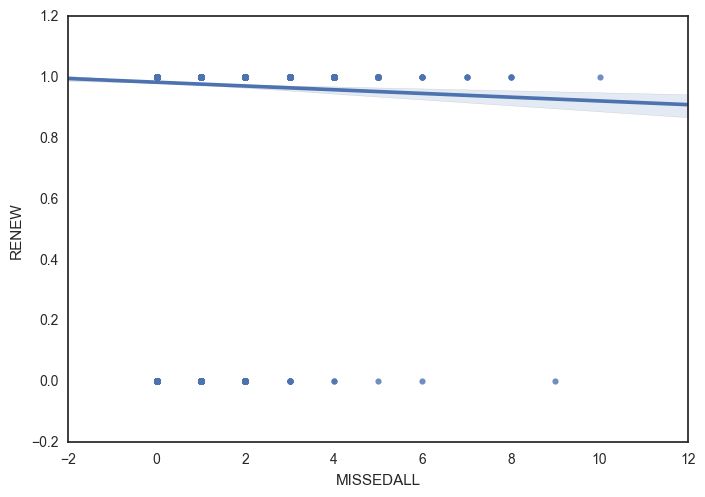

In [33]:
sns.plt.show()

In [34]:
sns.regplot(x='NOTES', y='RENEW', data=Pats)

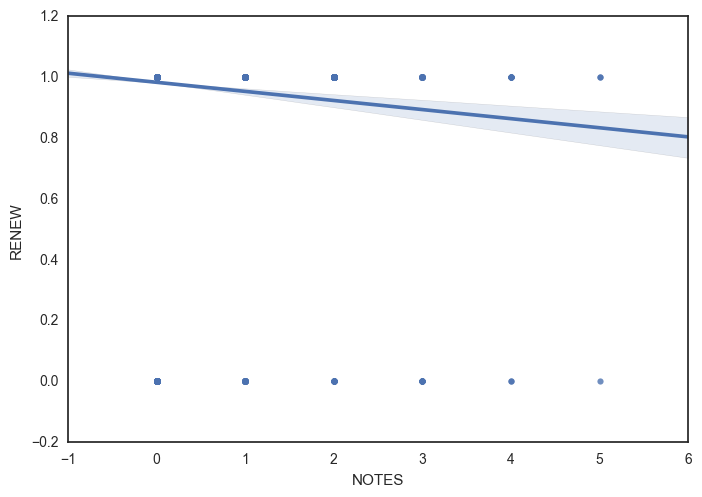

In [35]:
sns.plt.show()

In [36]:
sns.regplot(x='TICKETSPEND', y='RENEW', data=Pats)

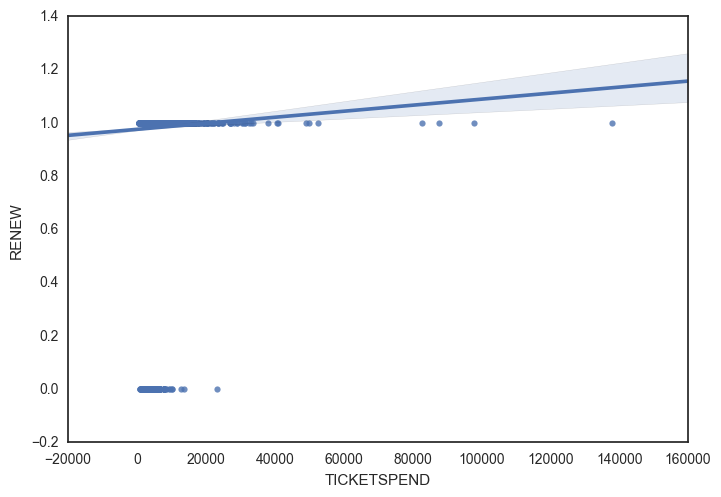

In [37]:
sns.plt.show()

In [38]:
sns.regplot(x='PLAYOFF', y='RENEW', data=Pats)

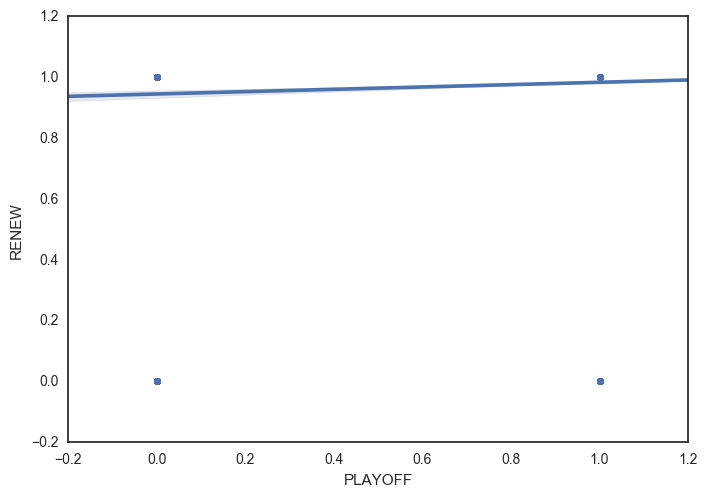

In [39]:
sns.plt.show()

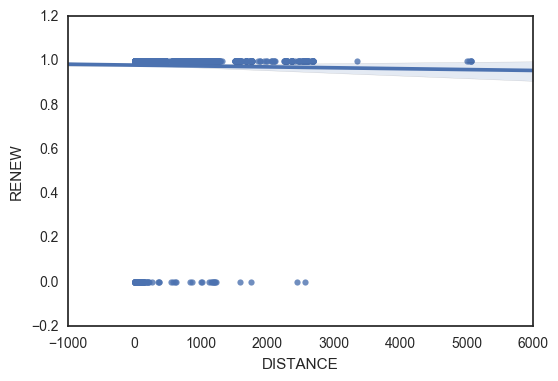

In [44]:
sns.regplot(x='DISTANCE', y='RENEW', data=Pats)

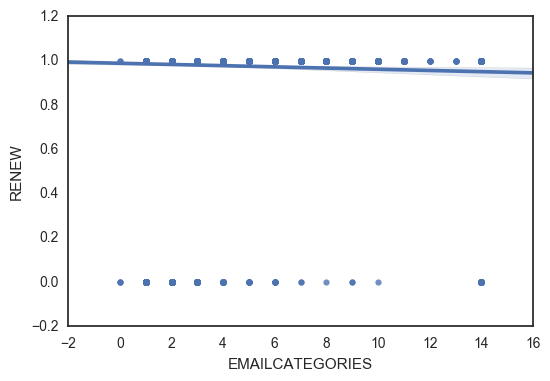

In [45]:
sns.regplot(x='EMAILCATEGORIES', y='RENEW', data=Pats)

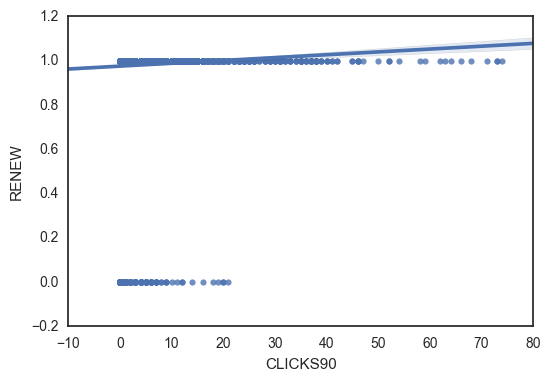

In [80]:
sns.regplot(x='CLICKS90', y='RENEW', data=Pats)

In [111]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

feature_cols = ['PLAYOFF', 'DISTANCE', 'TICKETSPEND', 'EMAILCATEGORIES', 'CLICKS90', 'LOGINS', 'MISSEDALL', 'TENURE', 'LIFETIMEMERCHSPEND','PAWP','OPENSNINETY','NOTES']

X = Pats[feature_cols]
y = Pats['RENEW']

k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96270175069659858, 0.94523151312292253, 0.97799544655322479, 0.97648447038069042, 0.97920449035860957, 0.97902311188218882, 0.97932540934288992, 0.97932540934288992, 0.97938586883503032, 0.97938586883503032, 0.97938586883503032, 0.97938586883503032, 0.97938586883503032, 0.97938586883503032, 0.97938586883503032, 0.97938586883503032, 0.97938586883503032, 0.97938586883503032, 0.97938586883503032]


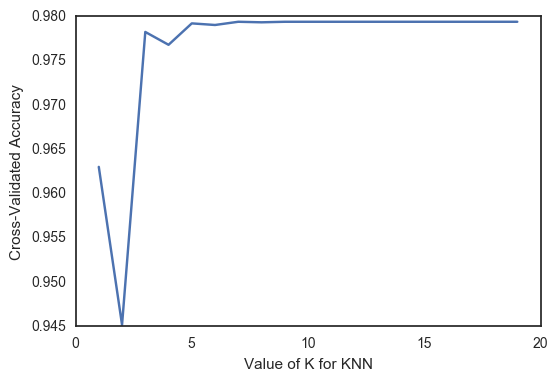

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [64]:
from sklearn.grid_search import GridSearchCV

k_range = list(range(1, 20))
leaf_size_range = list(range(20, 50))

param_grid = dict(n_neighbors=k_range, leaf_size=leaf_size_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.979385805828
{'n_neighbors': 7, 'leaf_size': 20}
KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')


In [65]:
knn = KNeighborsClassifier(n_neighbors=7, leaf_size=20)
scores = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')

print(scores.mean())

0.544936828388


In [112]:
from sklearn.ensemble import RandomForestClassifier

rf_Pats = RandomForestClassifier(n_estimators=1000)

rf_Pats.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [115]:
results = rf_Pats.predict(X)
Pats['predictions'] = results

In [116]:
Pats.to_csv('rfnewest.csv')

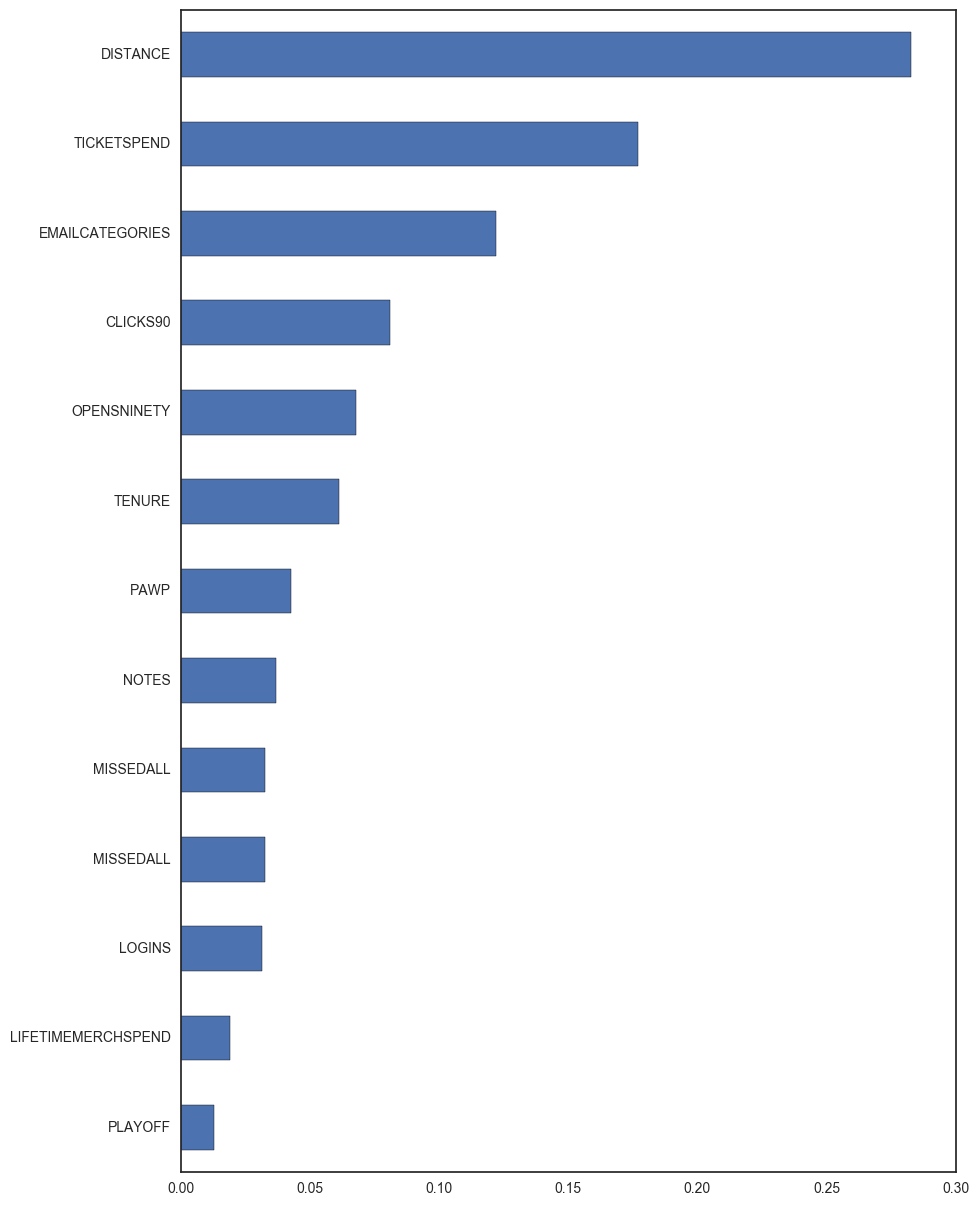

In [68]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf_Pats.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(10,15));

In [69]:
scores = cross_val_score(rf_Pats, X, y, cv=10, scoring='roc_auc')

print(scores.mean())

0.640519595059


In [87]:
from sklearn.linear_model import LogisticRegression

X = Pats[feature_cols]
y = Pats['RENEW']

logreg = LogisticRegression()

logreg.fit(X, y)

scores = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print(scores.mean())

0.701834777574


In [88]:
coef = logreg.coef_[0]
zipped = zip(feature_cols, coef)

print zipped


Pats['prediction'] = logreg.predict(X)

[('PLAYOFF', 1.0364303439945184), ('DISTANCE', -0.00010886865644266809), ('TICKETSPEND', 0.0001015456569343214), ('EMAILCATEGORIES', -0.15416421223187807), ('CLICKS90', 0.037985481779334175), ('LOGINS', 0.0034219300709438143), ('MISSEDALL', -0.098839244418233135), ('TENURE', -0.061794762897222855), ('LIFETIMEMERCHSPEND', 0.00641545415841243), ('PAWP', 0.07401897030558062), ('OPENSNINETY', 0.17640831819841934), ('NOTES', -0.64081418250220479)]


In [89]:
logreg.score(X, y)

0.97950671019223789

In [90]:
Pats = pd.read_csv("Patsnew.csv")

In [91]:
new_cols = ['INTERCEPT', 'PLAYOFF', 'DISTANCE', 'TICKETSPEND', 'EMAILCATEGORIES', 'CLICKS90', 'LOGINS', 'MISSEDALL', 'TENURE', 'LIFETIMEMERCHSPEND','MISSEDALL','PAWP','OPENSNINETY','NOTES']


X = Patsnew[new_cols]
y = Patsnew['RENEW']

logreg = LogisticRegression()

logreg.fit(X, y)

scores = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print(scores.mean())

0.704542967346


In [93]:
coef = logreg.coef_[0]
zipped = zip(new_cols, coef)

print zipped


Pats['prediction'] = logreg.predict(X)

[('INTERCEPT', 1.6868249661942574), ('PLAYOFF', 0.99139246149358595), ('DISTANCE', -0.00010927362968363411), ('TICKETSPEND', 0.00010380525394007052), ('EMAILCATEGORIES', -0.15411848989946167), ('CLICKS90', 0.040713189863175507), ('LOGINS', 0.0036082596778463593), ('MISSEDALL', -0.048389995563712387), ('TENURE', -0.069856481069719617), ('LIFETIMEMERCHSPEND', 0.0064383370467359455), ('MISSEDALL', -0.048389995563712387), ('PAWP', 0.0023895928396448023), ('OPENSNINETY', 0.17608302855319949), ('NOTES', -0.66497948687406883)]


In [92]:
logreg.score(X, y)

0.97950671019223789

In [82]:
newest_cols = ['INTERCEPT', 'PLAYOFF', 'TICKETSPEND', 'MISSEDALL', 'TENURE', 'LIFETIMEMERCHSPEND','OPENSNINETY','NOTES']


In [22]:
Patsnew = pd.read_csv('PatsNew.csv')

In [83]:
X = Patsnew[newest_cols]
y = Patsnew['RENEW']

logreg = LogisticRegression()

logreg.fit(X, y)

scores = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print(scores.mean())

0.713224101748


In [84]:
logreg.score(X, y)

0.97932535364526663

In [85]:
coef = logreg.coef_[0]
zipped = zip(newest_cols, coef)

print zipped

Pats['prediction'] = logreg.predict(X)

[('INTERCEPT', 1.4991851574839097), ('PLAYOFF', 0.98726483855305647), ('TICKETSPEND', 0.0001030003805991203), ('MISSEDALL', -0.10288894997261909), ('TENURE', -0.073317120103351036), ('LIFETIMEMERCHSPEND', 0.0058870631979583195), ('OPENSNINETY', 0.187682725886887), ('NOTES', -0.72501679568535482)]
